In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from pathlib import Path

project_root = Path("..")
processed_dir = project_root / "data" / "data" / "processed"


In [12]:
train_df = pd.read_csv(processed_dir / "train_processed.csv")
test_df = pd.read_csv(processed_dir / "test_processed.csv")

print("Shapes:")
print("Train:", train_df.shape)
print("Test:", test_df.shape)

X_train = train_df.drop(columns=["subject", "activity_id", "activity"])
y_train = train_df["activity"]

X_test = test_df.drop(columns=["subject", "activity_id", "activity"])
y_test = test_df["activity"]

print("Features:", X_train.shape[1])
print("Classes:", y_train.nunique())

Shapes:
Train: (7352, 69)
Test: (2947, 69)
Features: 66
Classes: 6


In [13]:
# PCA com 2 componentes para visualização
pca_2d = PCA(n_components=2)
X_train_pca = pca_2d.fit_transform(X_train)

print("Variância explicada por cada componente:", pca_2d.explained_variance_ratio_)
print("Variância total explicada (2 PCs):", pca_2d.explained_variance_ratio_.sum())

Variância explicada por cada componente: [0.66652    0.04208038]
Variância total explicada (2 PCs): 0.7086003791567447


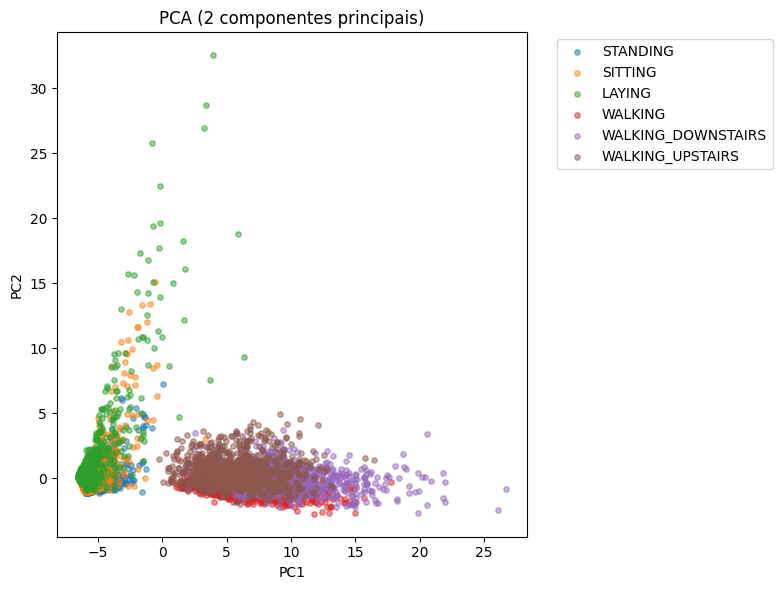

In [14]:
plt.figure(figsize=(8,6))
for activity in y_train.unique():
    mask = y_train == activity
    plt.scatter(X_train_pca[mask,0], X_train_pca[mask,1], label=activity, alpha=0.5, s=15)

plt.title("PCA (2 componentes principais)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


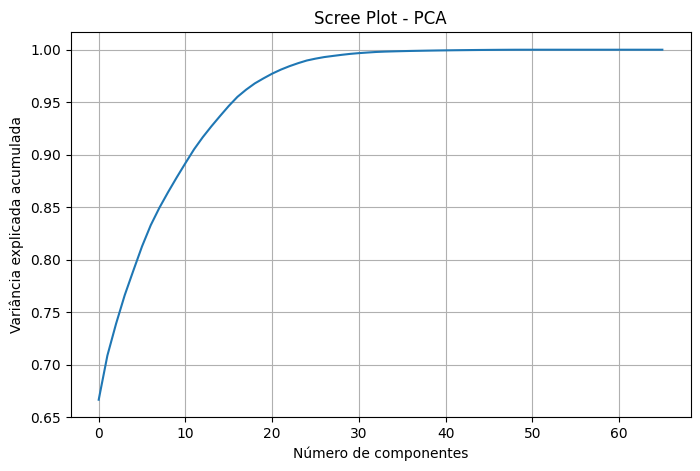

Número de componentes para explicar >=90% da variância: 12


In [15]:
pca_full = PCA().fit(X_train)

plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.xlabel("Número de componentes")
plt.ylabel("Variância explicada acumulada")
plt.title("Scree Plot - PCA")
plt.grid(True)
plt.show()

# Quantos componentes para >=90% da variância
n_components_90 = np.argmax(np.cumsum(pca_full.explained_variance_ratio_) >= 0.90) + 1
print(f"Número de componentes para explicar >=90% da variância: {n_components_90}")